In [1]:
import geopandas as gpd
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from shapely import wkt

In [2]:
def fix_geo(djk_path:list):

    lst = []
    for coor in djk_path:
        _lst_ = [coor]
        lst.append(_lst_)

    lstF = []
    while len(lst) != 0:
        if len(lst) == 1:
            lst.pop()
            break
        lstAux=lst[0]+lst[1]
        lstF.append(lstAux[0]+lstAux[1])
        lst.pop(0)

    _lstF_ = []
    for x in lstF:
        x = x.replace(", ", " ")
        x = x.replace(")(", ",")
        _lstF_.append(x)

    geo = [["geometry"]]
    for coor in _lstF_:
        coor = "LINESTRING " + coor
        _geo_ = [coor]
        geo.append(_geo_)
    return geo




In [3]:
import csv

def to_csv(geo_length, geo_harassment, geo_average):
    with open("harassment.csv", "w", newline="") as h:
        writer = csv.writer(h)
        writer.writerows(geo_harassment)

    with open("length.csv", "w", newline="") as l:
        writer = csv.writer(l)
        writer.writerows(geo_length)

    with open("average.csv", "w", newline="") as a:
        writer = csv.writer(a)
        writer.writerows(geo_average)
     

In [4]:
def average(df):
    array = df.values.tolist()

    for arrays in array:
        if arrays[5] == 0:
            arrays.append(arrays[3]/df['length'].max())
        else:
            arrays.append(arrays[3]/df['length'].max()+arrays[5])


    dataframe = pd.DataFrame(array, columns=['name','origin','destination','length','oneway','harassmentRisk','geometry','average'])
    return dataframe

In [5]:
from os import remove
def graph():
    route_harassment = pd.read_csv('harassment.csv',sep=';')
    route_harassment['geometry'] = route_harassment['geometry'].apply(wkt.loads)
    route_harassment = gpd.GeoDataFrame(route_harassment)

    route_len = pd.read_csv('length.csv',sep=';')
    route_len['geometry'] = route_len['geometry'].apply(wkt.loads)
    route_len = gpd.GeoDataFrame(route_len)

    route_avr = pd.read_csv('average.csv',sep=';')
    route_avr['geometry'] = route_avr['geometry'].apply(wkt.loads)
    route_avr = gpd.GeoDataFrame(route_avr)


    area = pd.read_csv('poligono_de_medellin.csv',sep=';')
    area['geometry'] = area['geometry'].apply(wkt.loads)
    area = gpd.GeoDataFrame(area)
    
    area1 = pd.read_csv('poligono_de_medellin.csv',sep=';')
    area1['geometry'] = area1['geometry'].apply(wkt.loads)
    area1 = gpd.GeoDataFrame(area1)
    
    area2 = pd.read_csv('poligono_de_medellin.csv',sep=';')
    area2['geometry'] = area2['geometry'].apply(wkt.loads)
    area2 = gpd.GeoDataFrame(area2)

    point_initial = gpd.GeoDataFrame(area1, geometry = gpd.points_from_xy([-75.5728593], [6.2115169]))

    point_final = gpd.GeoDataFrame(area2, geometry = gpd.points_from_xy([-75.5922942], [6.2495866]))

    edges = pd.read_csv('calles_de_medellin.csv',sep=';')
    edges['geometry'] = edges['geometry'].apply(wkt.loads)
    edges = gpd.GeoDataFrame(edges)



    fig, ax = plt.subplots(figsize=(50,50))

    area.plot(ax=ax, facecolor='black', legend=True)
    

    edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')

    
    route_harassment.plot(ax=ax, linewidth=1, edgecolor='green')
    route_len.plot(ax=ax, linewidth=1, edgecolor='red')
    route_avr.plot(ax=ax, linewidth=1, edgecolor='purple')


    point_final.plot(ax=ax, color = "orange", legend=True)
    point_initial.plot(ax=ax, color = "brown", legend=True)
    
    plt.title("Rutas calculadas")
    plt.tight_layout()
    plt.savefig("rutas.png")

    
    print("Punto café: INICIAL")
    print("Punto morado: FINAL")
    
    remove('harassment.csv')
    remove('length.csv')
    remove('average.csv')
    
    

Punto café: INICIAL
Punto morado: FINAL


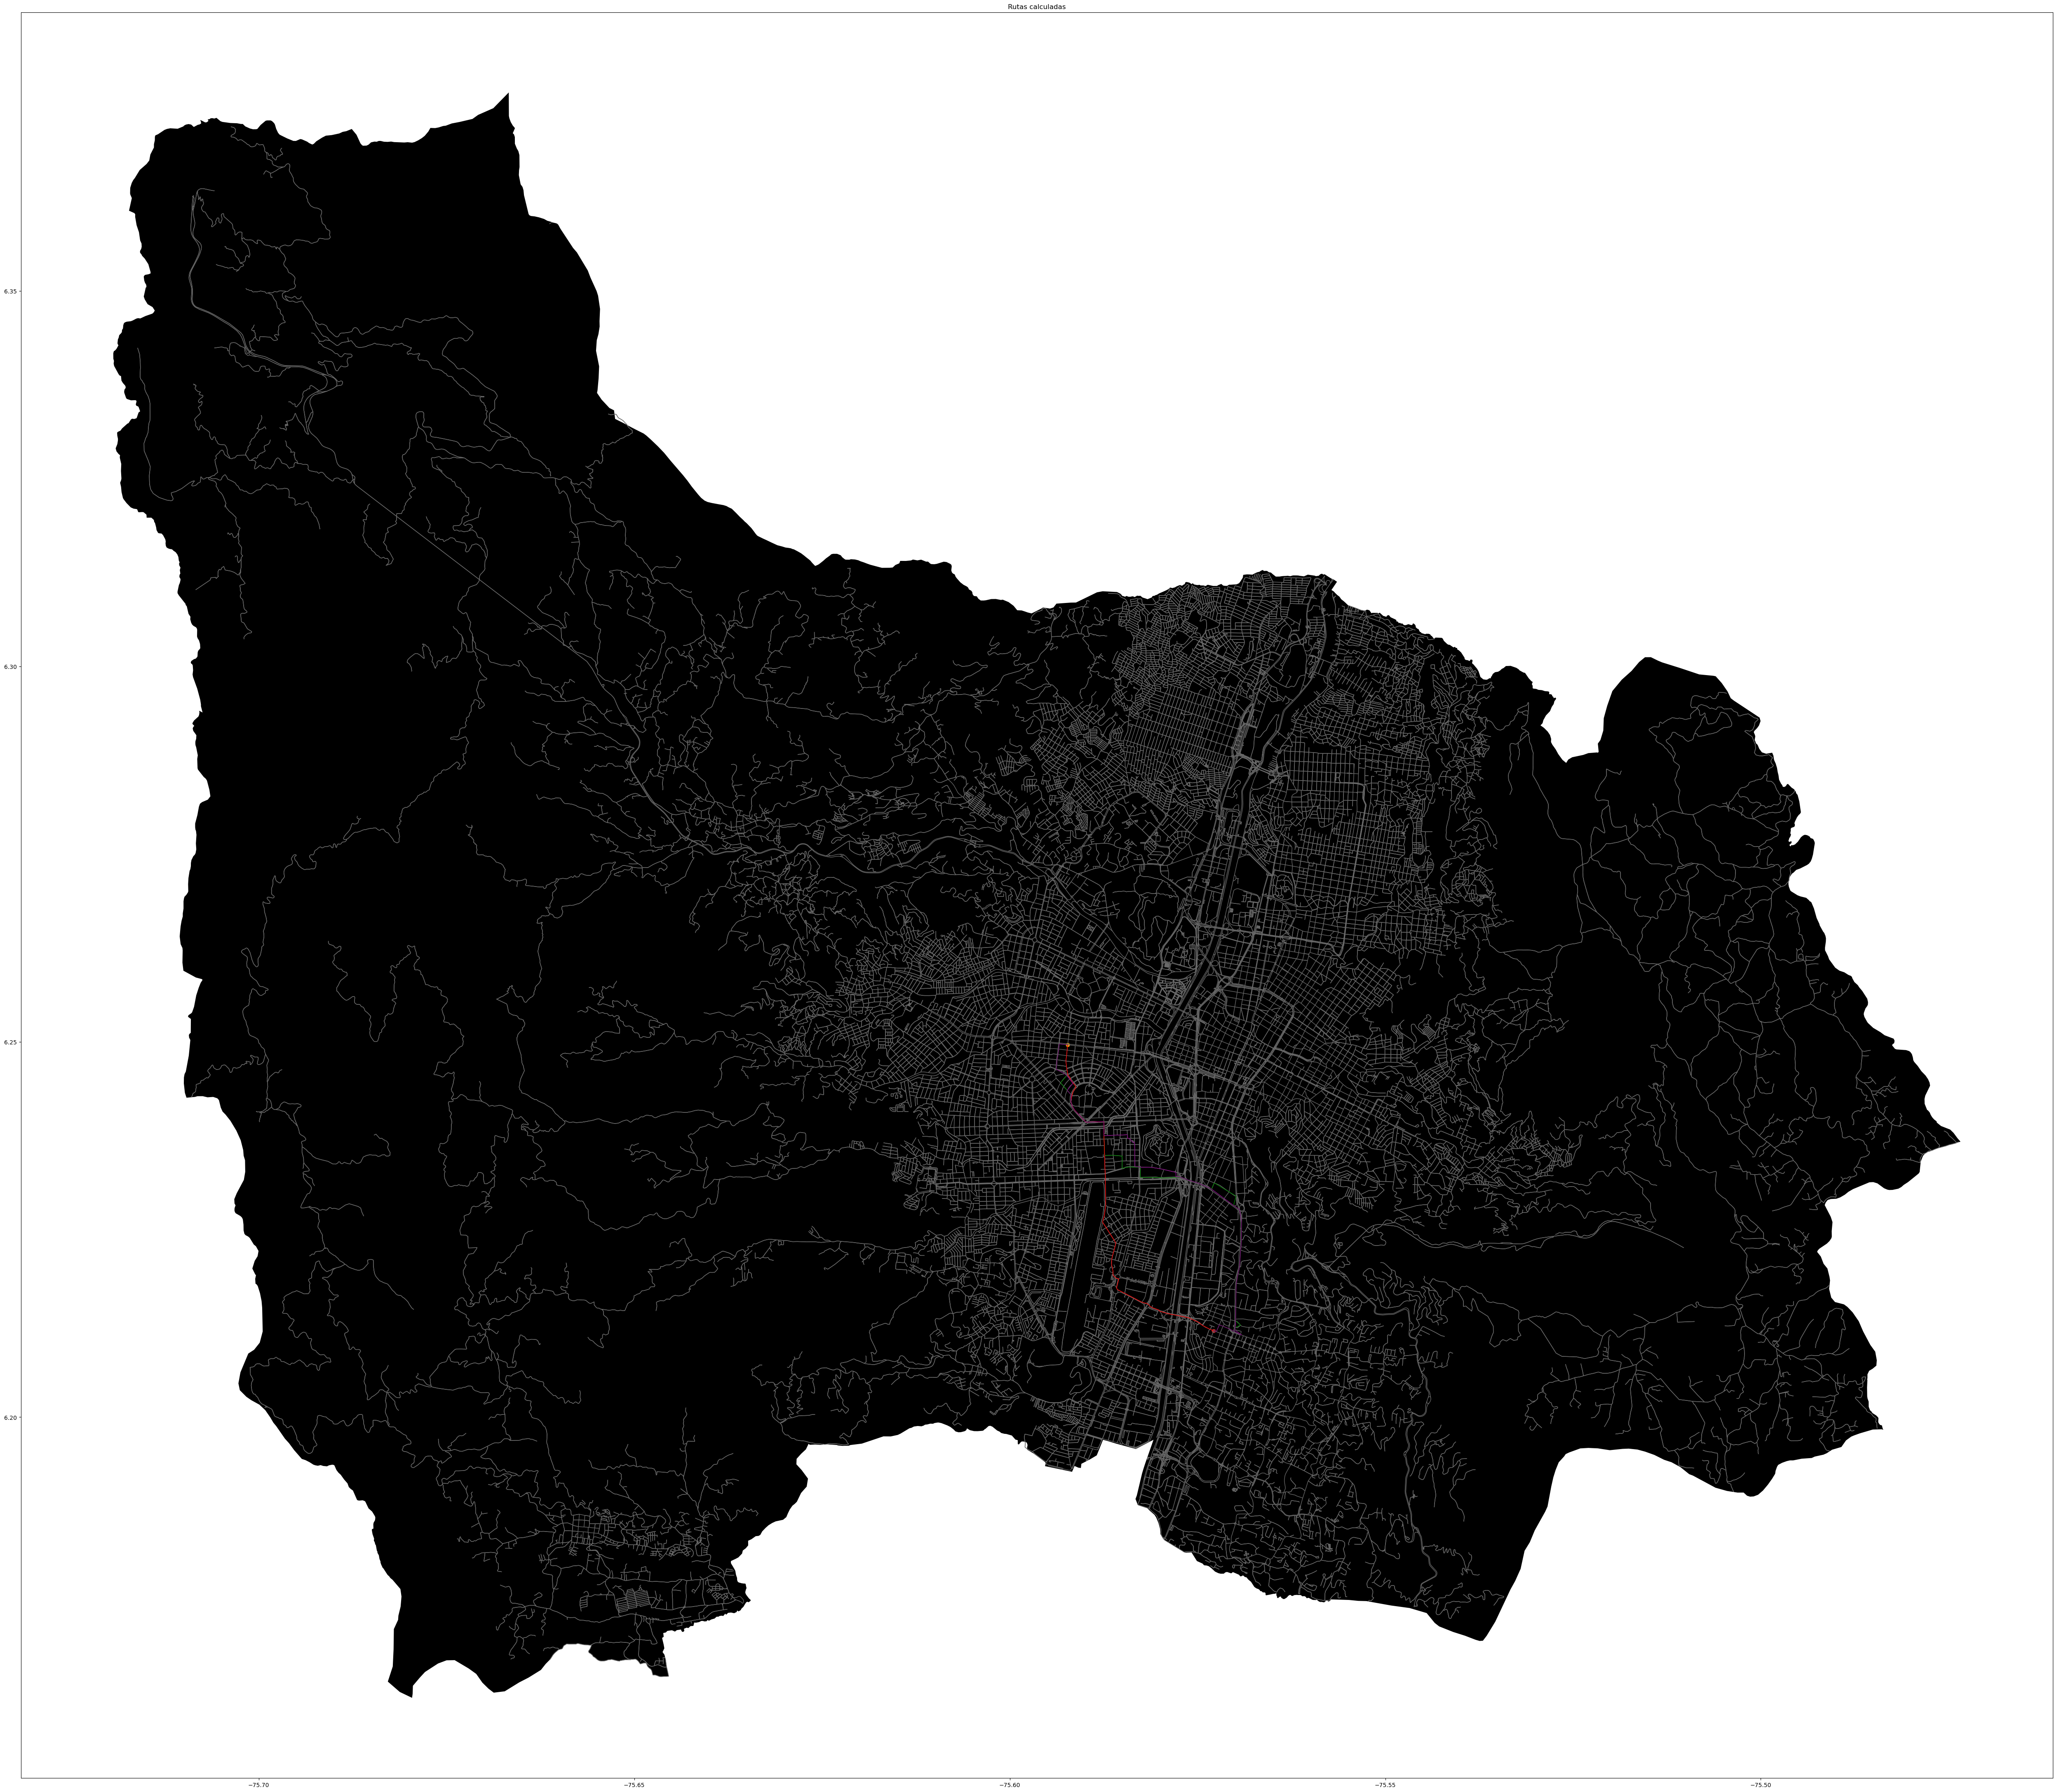

In [6]:
df = pd.read_csv("calles_de_medellin.csv",sep=';')
df = df.fillna(0)

streets_length = nx.from_pandas_edgelist(df,source="origin", target="destination", edge_attr="length")
djk_path_length = nx.dijkstra_path(streets_length, source='(-75.5728593, 6.2115169)', target='(-75.5922942, 6.2495866)', weight="length")
geo_length = fix_geo(djk_path_length)

streets_harassment = nx.from_pandas_edgelist(df,source="origin", target="destination", edge_attr="harassmentRisk")
djk_path_harassment = nx.dijkstra_path(streets_harassment, source='(-75.5728593, 6.2115169)', target='(-75.5922942, 6.2495866)', weight="harassmentRisk")
geo_harassment = fix_geo(djk_path_harassment)

df = average(df)
streets_avr = nx.from_pandas_edgelist(df,source="origin", target="destination", edge_attr="average")
djk_path_average = nx.dijkstra_path(streets_avr, source='(-75.5728593, 6.2115169)', target='(-75.5922942, 6.2495866)', weight="average")
geo_average = fix_geo(djk_path_average)

to_csv(geo_length, geo_harassment, geo_average)

graph()





